In [1]:
import sys
sys.path.insert(0, '/home/priyam145/MelDetect/Libraries')

import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import tflite
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import models

In [2]:
tflite_model_name = "effnet_b6.tflite"

In [8]:
effnet_model = models.build_mini_featvec_model("efficientnet_B6", dim=384)
effnet_model.load_weights("/home/priyam145/MelDetect/my_checkpoints/Featvec_models/Full_models/efficientnet_B6/efficientnet_B6_fold0_384.h5")

In [10]:
effnet_converter = tf.lite.TFLiteConverter.from_keras_model(effnet_model)

In [11]:
effnet_tflite = effnet_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpe57mhb3g/assets


In [16]:
os.makedirs(os.path.join("../Models/tflite_models"), exist_ok=True)
with open(os.path.join("../Models/tflite_models", tflite_model_name), "wb") as tflite_writer:
    tflite_writer.write(effnet_tflite)


In [3]:
interpreter = tf.lite.Interpreter(model_path=os.path.join("../Models/tflite_models", tflite_model_name))
interpreter.allocate_tensors()

In [4]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [5]:
input_details

[{'name': 'img_input',
  'index': 0,
  'shape': array([  1, 384, 384,   3], dtype=int32),
  'shape_signature': array([ -1, 384, 384,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [6]:
output_details

[{'name': 'Identity',
  'index': 1311,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

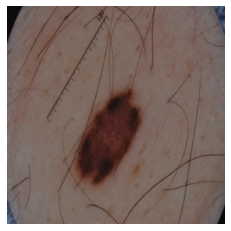

In [44]:
test_img = mpimg.imread("../Models/good_test_images/ISIC_0012092.jpg")
test_img = tf.cast(test_img/255, tf.float32)
plt.imshow(test_img)
plt.axis("off");

In [45]:
interpreter.set_tensor(input_details[0]["index"], tf.expand_dims(test_img, 0))
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]["index"])

In [46]:
output_data

array([[0.18397152]], dtype=float32)